In [335]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [336]:
#read the file
df=pd.read_csv("/content/drive/MyDrive/Dataset/Video Game Sale/vgsales.csv")

In [337]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [339]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [340]:
df.dropna(inplace=True)

In [341]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [342]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [343]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

data_cat_en = encoder.fit_transform(df_cat)
print(data_cat_en)

[[1.0849e+04 2.6000e+01 1.0000e+01 3.5900e+02]
 [9.2010e+03 1.1000e+01 4.0000e+00 3.5900e+02]
 [5.4930e+03 2.6000e+01 6.0000e+00 3.5900e+02]
 ...
 [8.0390e+03 1.6000e+01 6.0000e+00 2.1000e+01]
 [4.9380e+03 4.0000e+00 5.0000e+00 8.0000e+00]
 [8.8500e+03 6.0000e+00 4.0000e+00 5.4400e+02]]


In [344]:
# Create the dataframe
data_cat_en = pd.DataFrame(data_cat_en,columns=['Name', 'Platform','Genre','Publisher'])

In [345]:
data_cat_en.head()


,Name,Platform,Genre,Publisher
0,10849.0,26.0,10.0,359.0
1,9201.0,11.0,4.0,359.0
2,5493.0,26.0,6.0,359.0
3,10851.0,26.0,10.0,359.0
4,7247.0,5.0,7.0,359.0


In [346]:
df.drop({'Name','Platform','Genre','Publisher'},inplace=True,axis=1)

In [347]:
df.isnull().sum()

Rank            0
Year            0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [348]:
df=pd.concat([df,data_cat_en],axis='columns')

In [349]:
df.drop({'Other_Sales','JP_Sales'},axis=1,inplace=True)
df.head()

,Rank,Year,NA_Sales,EU_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1.0,2006.0,41.49,29.02,82.74,10849.0,26.0,10.0,359.0
1,2.0,1985.0,29.08,3.58,40.24,9201.0,11.0,4.0,359.0
2,3.0,2008.0,15.85,12.88,35.82,5493.0,26.0,6.0,359.0
3,4.0,2009.0,15.75,11.01,33.00,10851.0,26.0,10.0,359.0
4,5.0,1996.0,11.27,8.89,31.37,7247.0,5.0,7.0,359.0


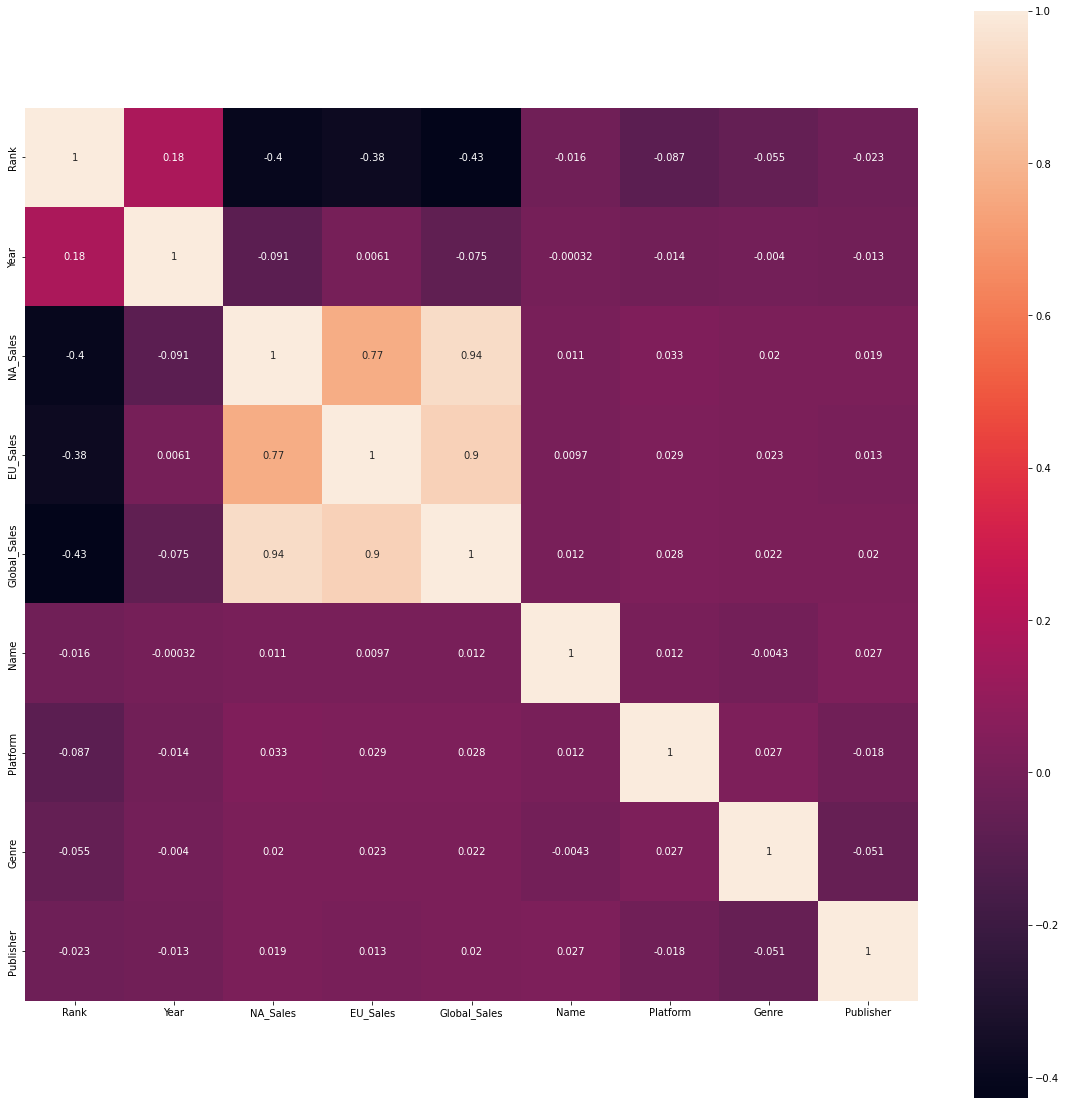

In [350]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,square=True)

In [351]:
df.dropna(inplace=True)

In [352]:
X=df.drop(['Global_Sales'],axis=1)
y=df['Global_Sales']

In [357]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)


In [358]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [359]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred=lr.predict(X_test)

In [362]:
print("The model's metrics values are: ")
print("Accuracy: ", round(lr.score(X_test,y_test)*100,2))
print("Mean Absolute Error: ",mean_absolute_error(df_pred , y_test))
print("Mean Squared Error: " ,mean_squared_error(df_pred,y_test))
print("R-squared score: ", r2_score(y_test,df_pred))

The model's metrics values are: 
Accuracy:  97.73
Mean Absolute Error:  0.12247363431829293
Mean Squared Error:  0.08498516652219483
R-squared score:  0.9773187340177094
